In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine_dataset = pd.read_csv("/content/whitewinequality.csv")
wine_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(4898, 12)

In [ ]:
#display first ten rows
wine_dataset.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#statistical measure of the dataset
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [ ]:
# Data Cleaning
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of outliers: 40


<Figure size 2000x2000 with 0 Axes>

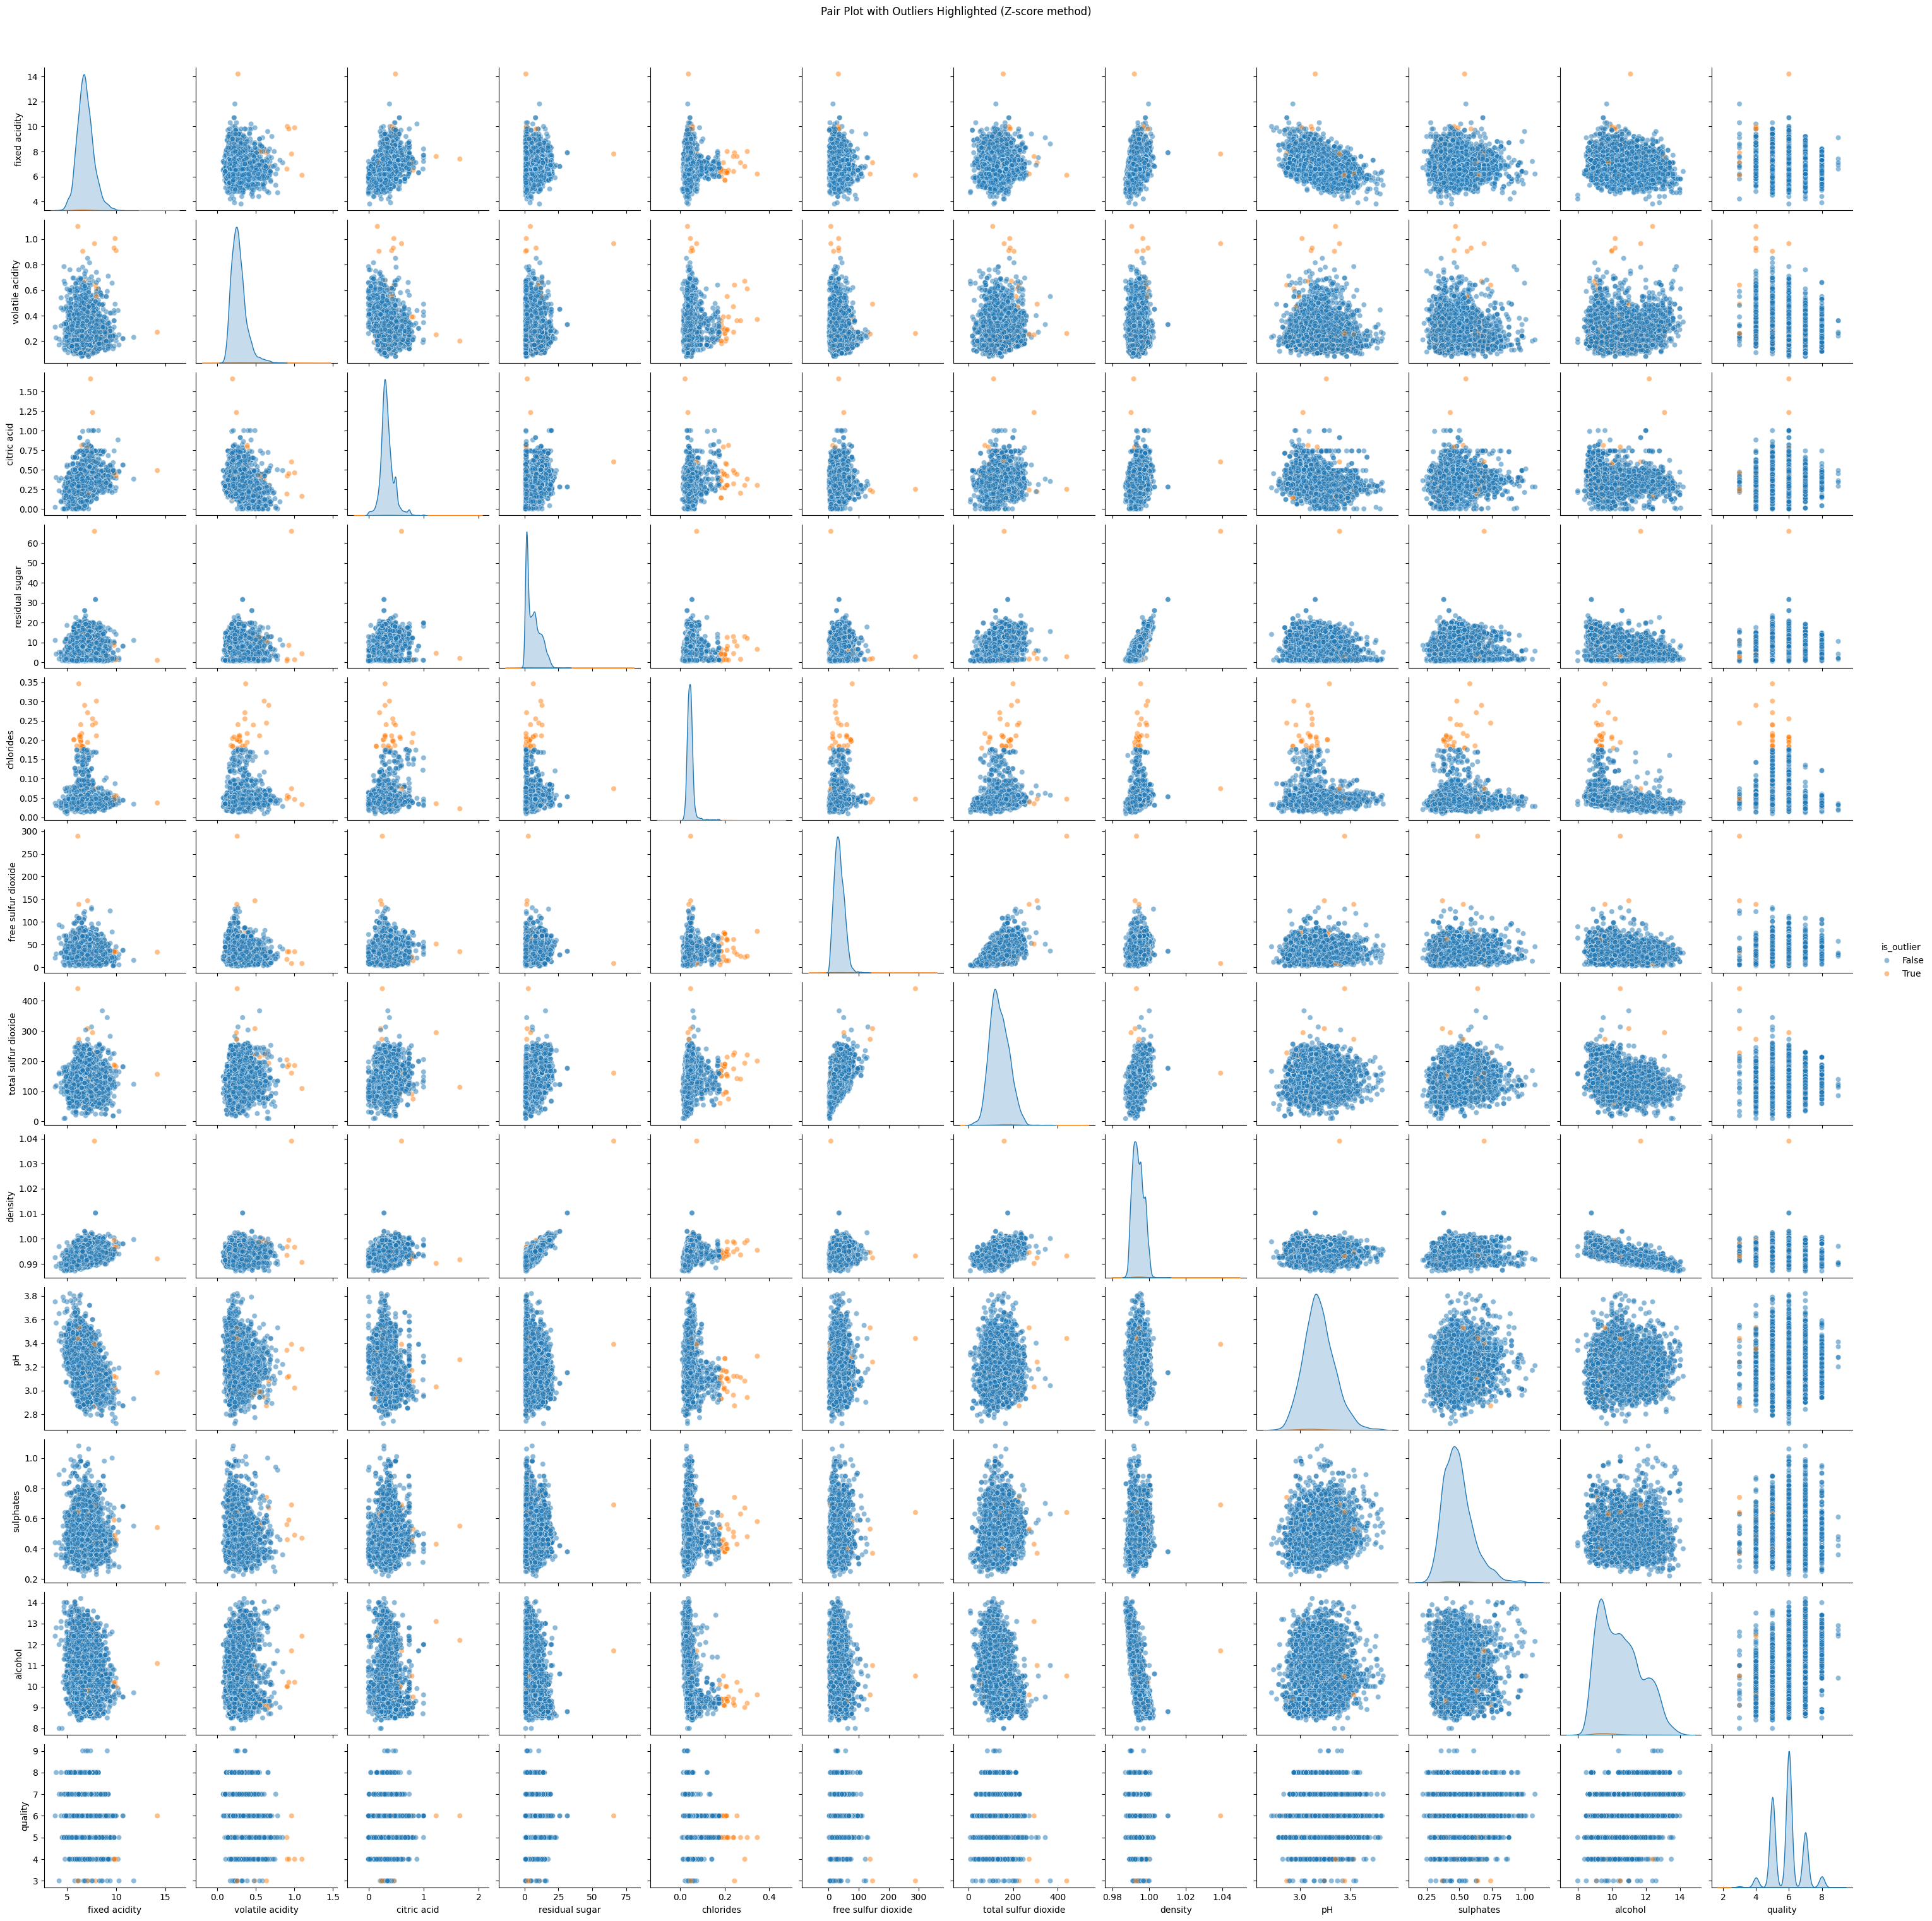

In [ ]:
#Detection of Outliers
z_scores = np.abs(stats.zscore(wine_dataset.drop('quality', axis=1)))
threshold = 6
outliers = (z_scores > threshold).any(axis=1)
print("Number of outliers:", outliers.sum())
wine_dataset['is_outlier'] = outliers
plt.figure(figsize=(20, 20))
sns.pairplot(wine_dataset, hue='is_outlier', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot with Outliers Highlighted (Z-score method)", y=1.02)
plt.show()

In [ ]:
wine_dataset.drop('is_outlier', axis=1, inplace=True)

In [ ]:
wine_dataset.shape

(4898, 12)

In [ ]:
X = wine_dataset.drop('quality', axis=1)
Y = wine_dataset['quality']

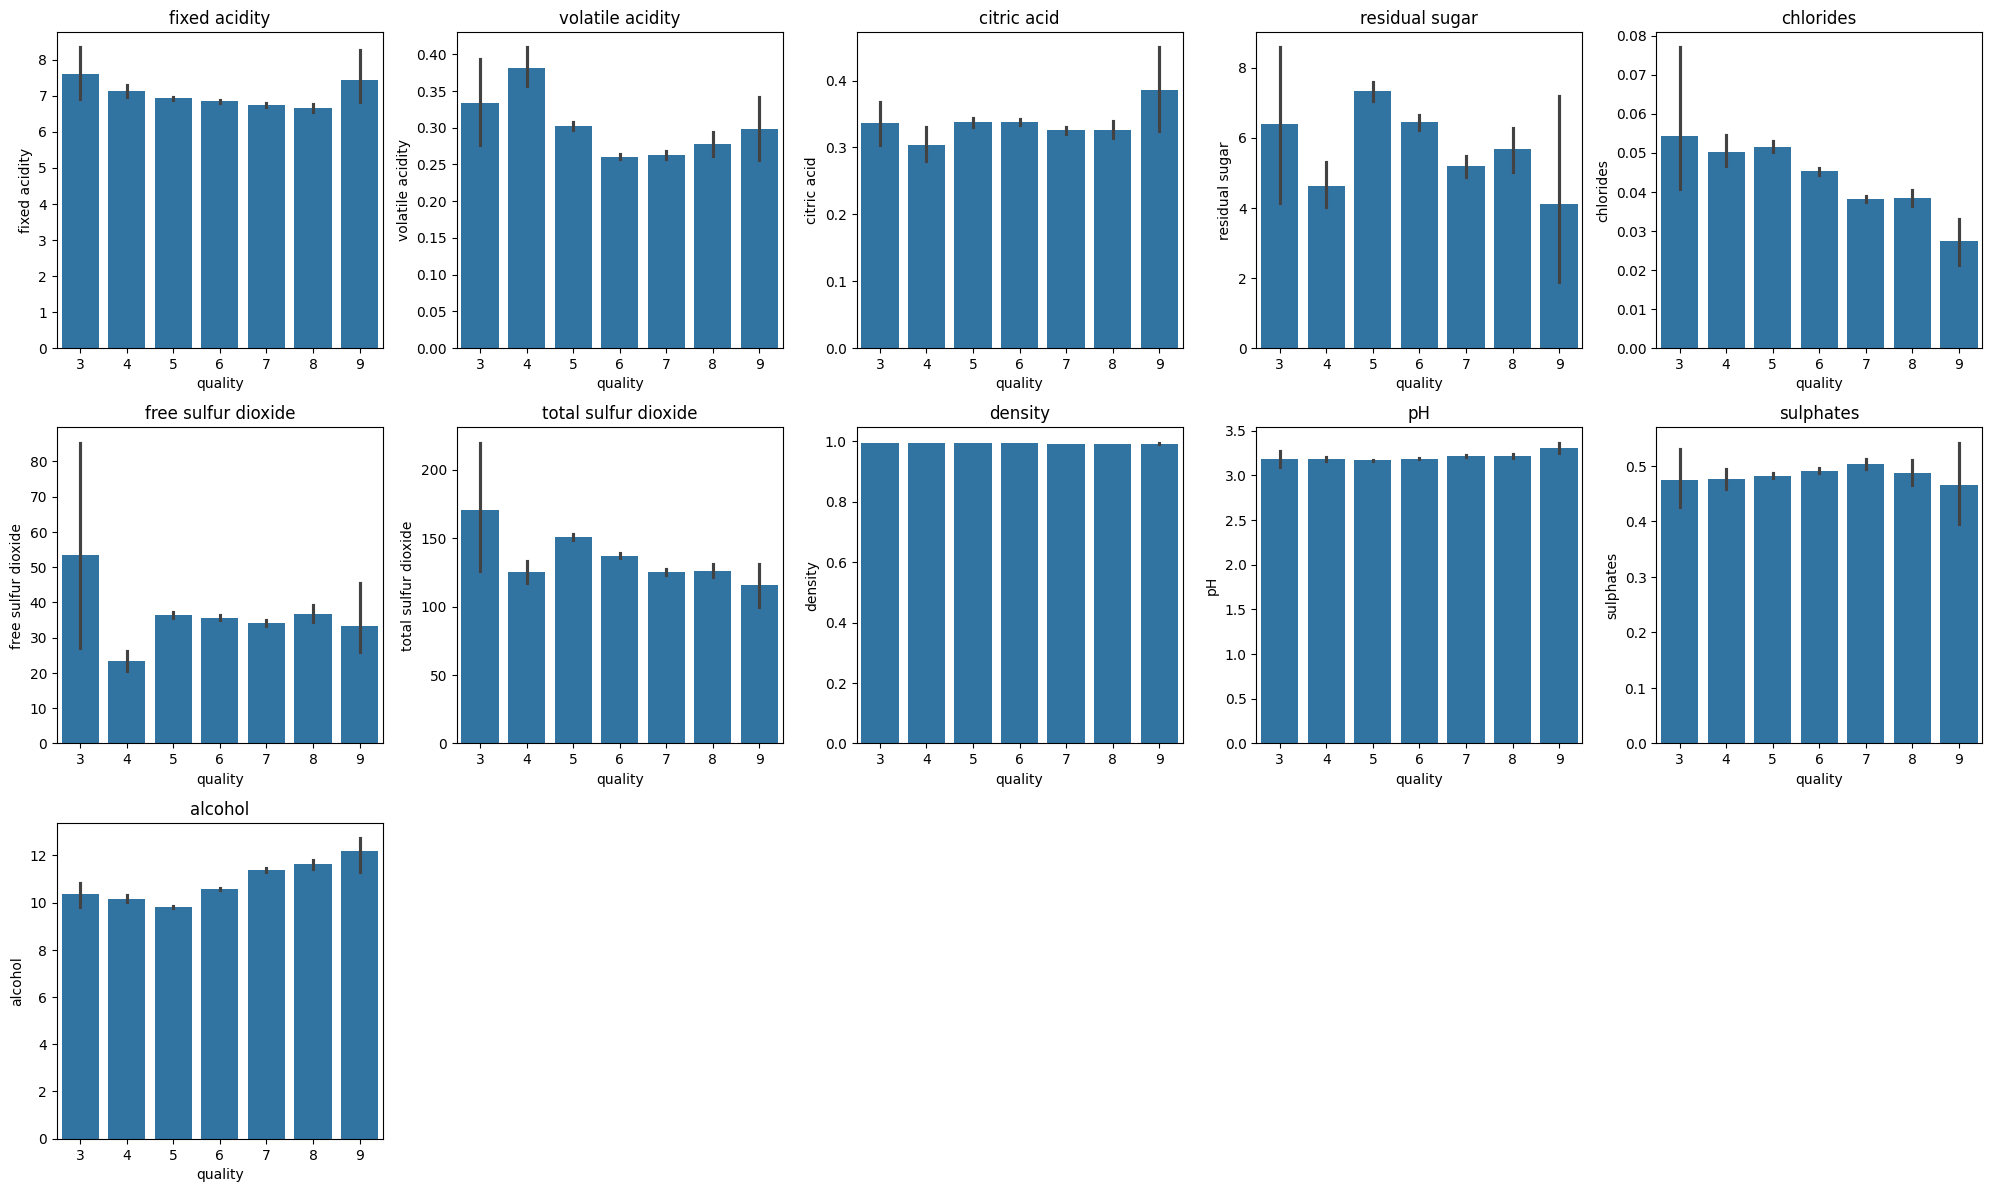

In [ ]:
features = [col for col in wine_dataset.columns if col != 'quality']
n_features = len(features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine_dataset, ax=axes[i])
    axes[i].set_title(feature)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(pad=1.0)
plt.show()

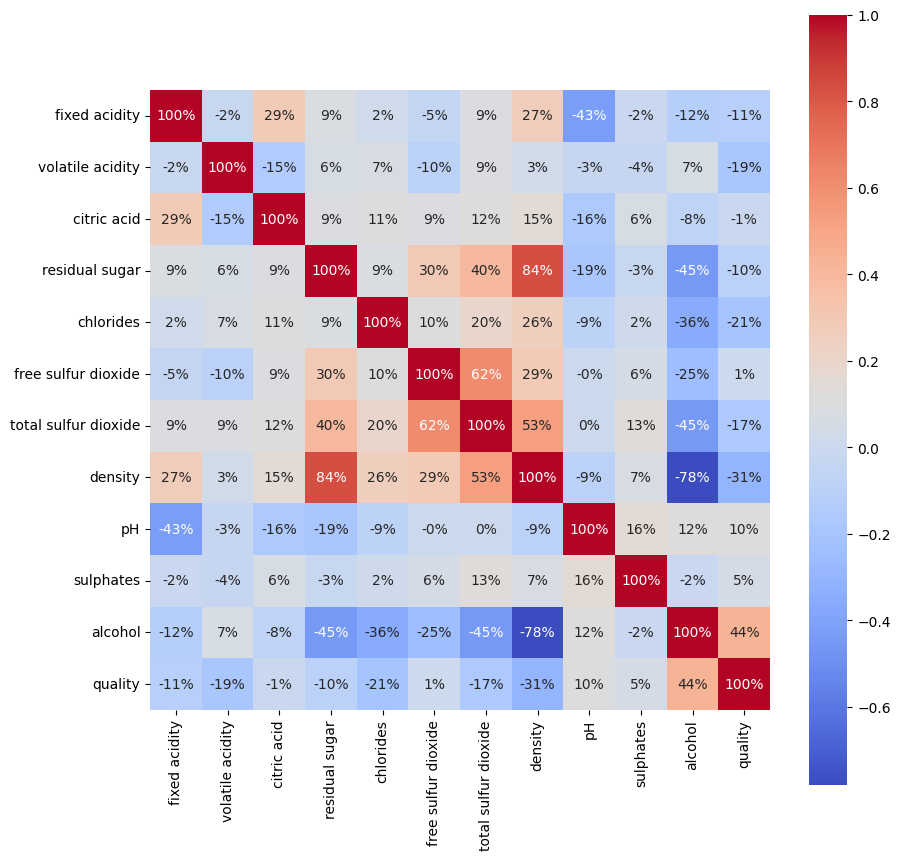

Correlation of different features of our wine_dataset with quality:
fixed acidity : -0.1137
volatile acidity : -0.1947
citric acid : -0.0092
residual sugar : -0.0976
chlorides : -0.2099
free sulfur dioxide : 0.0082
total sulfur dioxide : -0.1747
density : -0.3071
pH : 0.0994
sulphates : 0.0537
alcohol : 0.4356
quality : 1.0000


In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine_dataset.corr(method='pearson'), annot=True, cmap='coolwarm',square=True,fmt='.0%')
plt.show()
print('Correlation of different features of our wine_dataset with quality:')
for i in wine_dataset.columns:
  corr, _ = pearsonr(wine_dataset[i], wine_dataset['quality'])
  print('%s : %.4f' %(i,corr))

In [ ]:
#top 9 features with respect to quality
correlations = wine_dataset.corr()['quality'].sort_values(ascending=False).drop('quality')
print(correlations)

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [ ]:
selected_features = ['alcohol', 'citric acid', 'sulphates', 'fixed acidity', 'residual sugar']
X = wine_dataset[selected_features]
print(X)

      alcohol  citric acid  sulphates  fixed acidity  residual sugar
0         8.8         0.36       0.45            7.0            20.7
1         9.5         0.34       0.49            6.3             1.6
2        10.1         0.40       0.44            8.1             6.9
3         9.9         0.32       0.40            7.2             8.5
4         9.9         0.32       0.40            7.2             8.5
...       ...          ...        ...            ...             ...
4893     11.2         0.29       0.50            6.2             1.6
4894      9.6         0.36       0.46            6.6             8.0
4895      9.4         0.19       0.46            6.5             1.2
4896     12.8         0.30       0.38            5.5             1.1
4897     11.8         0.38       0.32            6.0             0.8

[4898 rows x 5 columns]


In [ ]:
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(3918, 5) (980, 5) (3918,) (980,)


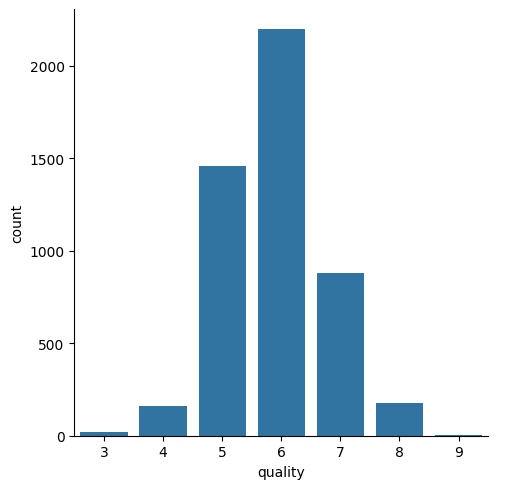

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

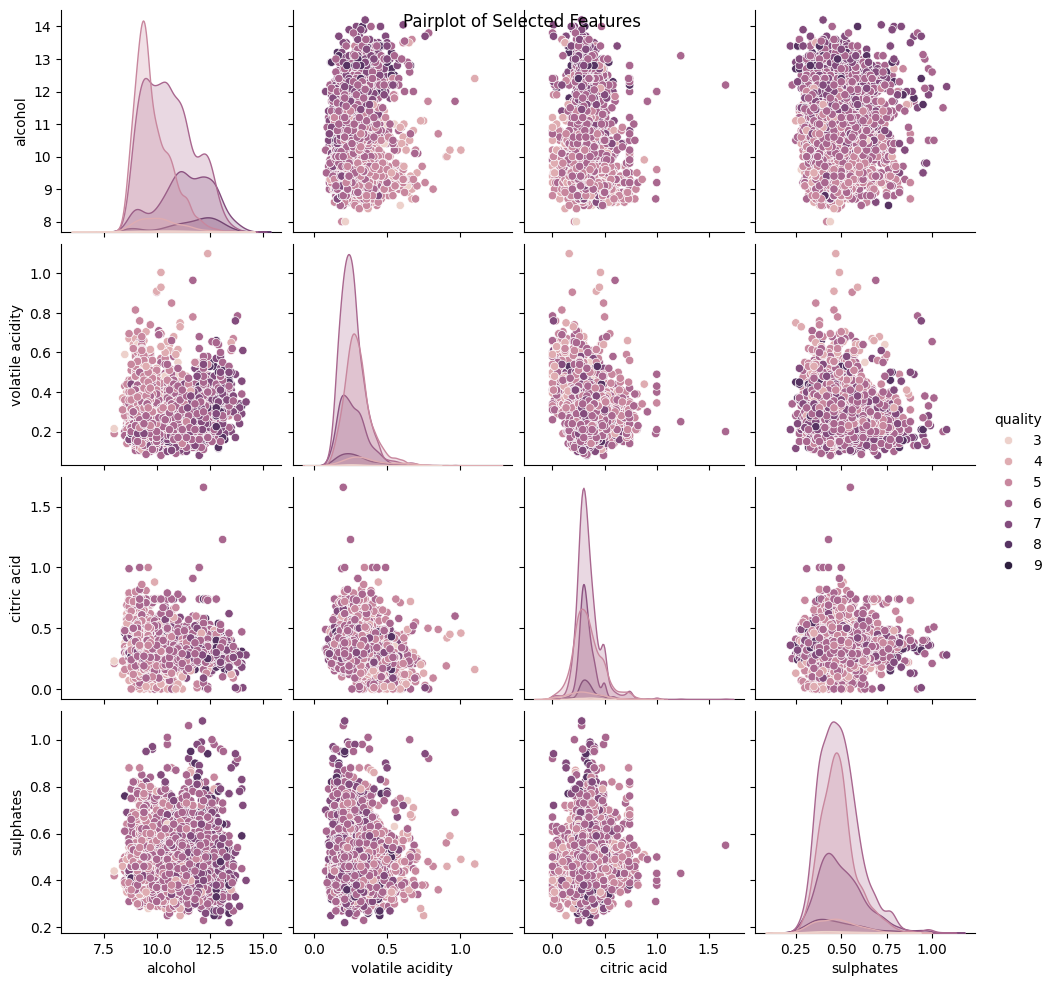

In [ ]:
sns.pairplot(wine_dataset, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates'], hue='quality')
plt.suptitle('Pairplot of Selected Features')
plt.show()

In [ ]:
#SUPORT VECTOR CLASSIFIER
svm_model = SVC()
svm_model.fit(X_train, Y_train)
X_test_prediction_svm = svm_model.predict(X_test)
#accuracy
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_svm, Y_test) * 100, 2)}%')

Model accuracy score: 79.39%


In [ ]:
# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=26))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_svm = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(Y_test,X_test_prediction_svm) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_svm = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_svm})
print(Y_compare_svm.head())

Model accuracy score: 81.02%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0


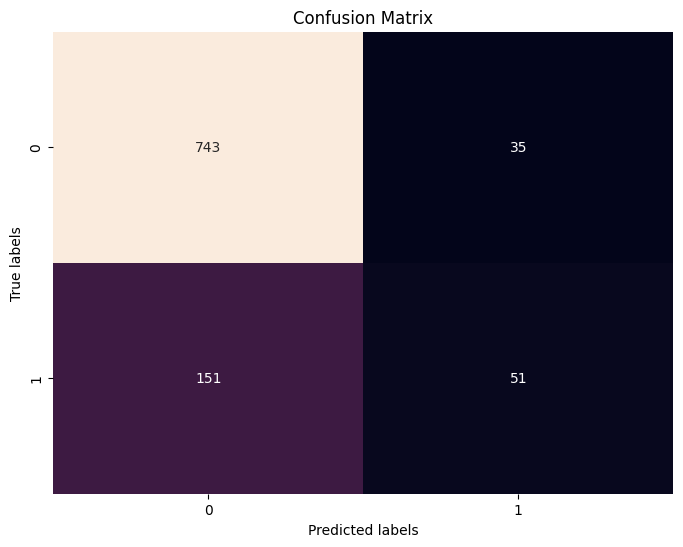

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

AUC score: 0.60


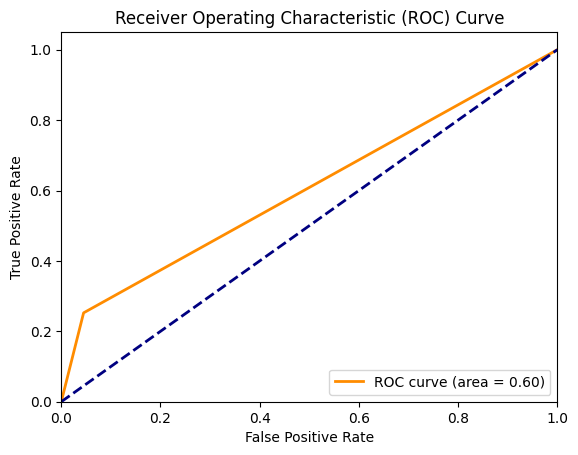

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction_svm)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc:.2f}')
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)
X_test_prediction_logreg = logreg_model.predict(X_test)
# Accuracy on test data using Logistic Regression
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_logreg, Y_test) * 100, 2)}%')

Model accuracy score: 81.33%


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic regression', LogisticRegression(random_state=26))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_log = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_log, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_log = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_log})
print(Y_compare_log.head(7))

Model accuracy score: 81.43%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0
2307       0          0
1186       0          0


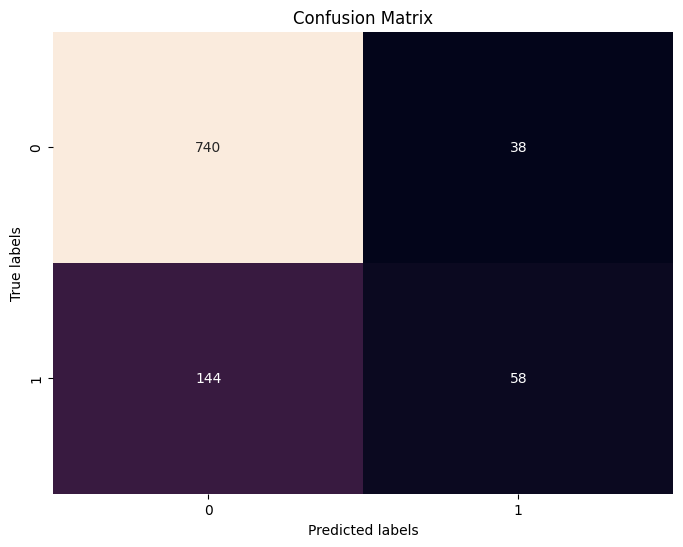

In [ ]:
cm = confusion_matrix( Y_test,X_test_prediction_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Define the neural network model
net = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression task (1 output neuron)
])
# Compile the net
net.compile(optimizer='adam', loss='mean_squared_error')
# Train the net
history = net.fit(X_train, Y_train, epochs=60, batch_size=32, validation_split=0.1)
# Evaluate the net on test data
predictions = net.predict(X_test)
predictions=(predictions>0.5).astype(int)
#accuracy
print(f'net accuracy score: {round(accuracy_score(Y_test,predictions) * 100, 2)}%')

Epoch 1/60
111/111 [==============================] - 1s 4ms/step - loss: 1.1869 - val_loss: 0.2251
Epoch 2/60
111/111 [==============================] - 0s 3ms/step - loss: 0.3451 - val_loss: 0.1531
Epoch 3/60
111/111 [==============================] - 0s 3ms/step - loss: 0.2572 - val_loss: 0.1502
Epoch 4/60
111/111 [==============================] - 0s 3ms/step - loss: 0.2242 - val_loss: 0.1489
Epoch 5/60
111/111 [==============================] - 0s 3ms/step - loss: 0.2047 - val_loss: 0.1503
Epoch 6/60
111/111 [==============================] - 0s 2ms/step - loss: 0.1946 - val_loss: 0.1485
Epoch 7/60
111/111 [==============================] - 0s 3ms/step - loss: 0.1839 - val_loss: 0.1471
Epoch 8/60
111/111 [==============================] - 0s 2ms/step - loss: 0.1763 - val_loss: 0.1453
Epoch 9/60
111/111 [==============================] - 0s 2ms/step - loss: 0.1716 - val_loss: 0.1476
Epoch 10/60
111/111 [==============================] - 0s 2ms/step - loss: 0.1686 - val_loss: 0.1483

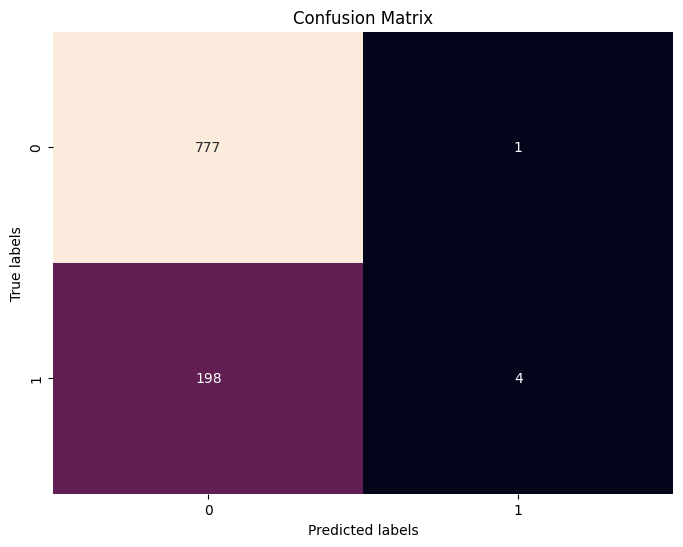

In [ ]:
cm = confusion_matrix( Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model = RFC()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare = pd.DataFrame({'Actual' : Y_test, 'Predicted' : X_test_prediction})
print(Y_compare.head())

Model accuracy score: 87.55%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0


In [ ]:
# Create a pipeline with StandardScaler and rfc
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RFC(random_state=40))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=7, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_rfc = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_rfc, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_rfc = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_rfc})
print(Y_compare_rfc.head(8))

Model accuracy score: 88.27%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0
2307       0          0
1186       0          0
3930       0          0


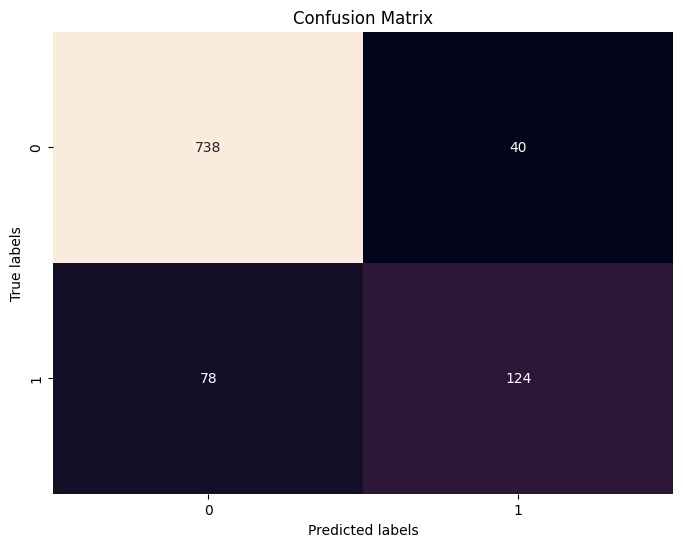

In [ ]:
cm = confusion_matrix(  Y_test,X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

AUC score: 0.83


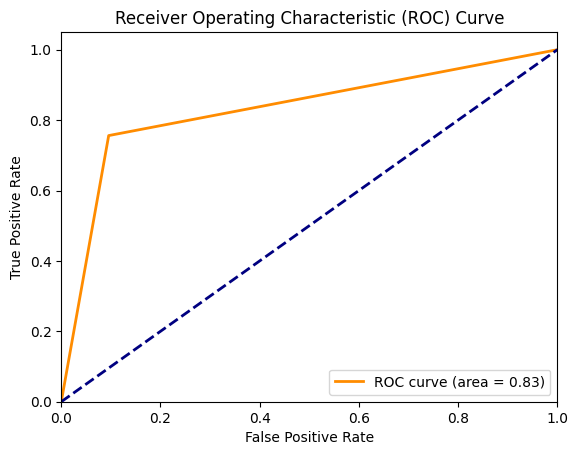

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(X_test_prediction, Y_test)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc:.2f}')
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
# Simulated accuracy values from multiple runs
accuracy_values = np.array([0.878,0.880,0.874,0.877,0.871])
# Calculate the mean accuracy
mean_accuracy = np.mean(accuracy_values)
# Calculate the standard deviation of the accuracy values
std_dev_accuracy = np.std(accuracy_values,ddof=1)
# Calculate the standard error
n_runs = len(accuracy_values)
standard_error = std_dev_accuracy / np.sqrt(n_runs)
#error rate
error_rate = 1 - mean_accuracy
print(f'Error rate:{round(error_rate *100 ,2)}%')
print(f"Standard Error of Accuracy: {standard_error}")

Error rate:12.4%
Standard Error of Accuracy: 0.001581138830084191


In [ ]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
X_test_prediction_knn = knn.predict(X_test)
# Accuracy on test data using KNN
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_knn, Y_test) * 100, 2)}%')

Model accuracy score: 82.55%


In [ ]:
pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=32))
])
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_knn = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_knn, Y_test) * 100, 2)}%')

Model accuracy score: 81.53%


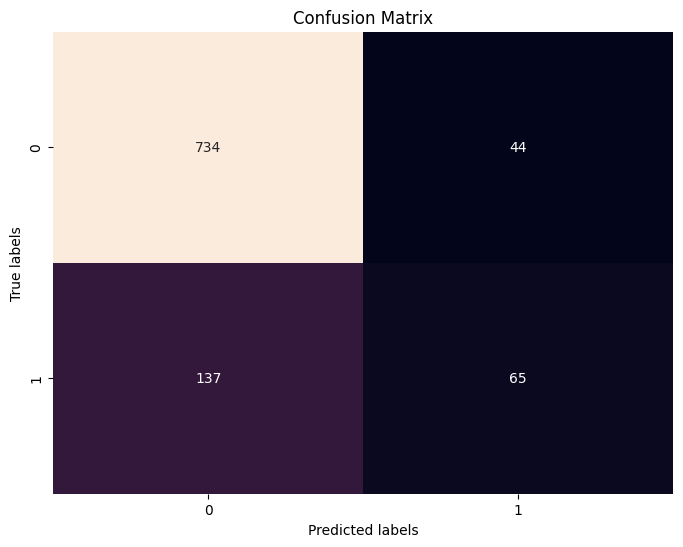

In [ ]:
cm = confusion_matrix(  Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_model = GradientBoostingClassifier()
# Train the Gradient Boosting model
gb_model.fit(X_train, Y_train)
# Predict on test data
X_test_prediction_gb = gb_model.predict(X_test)
# Accuracy on test data using Gradient Boosting
test_data_accuracy_gb = accuracy_score(X_test_prediction_gb, Y_test)
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_gb, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare_gb = pd.DataFrame({'Actual' : Y_test, 'Predicted' : X_test_prediction_gb})
print(Y_compare_gb.head())

Model accuracy score: 81.33%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gba', GradientBoostingClassifier(random_state=42))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_gbr = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_gbr, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_gbr = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_gbr})
print(Y_compare_gbr.head(10))

Model accuracy score: 81.33%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0
2307       0          0
1186       0          0
3930       0          0
4089       0          0
1060       1          0


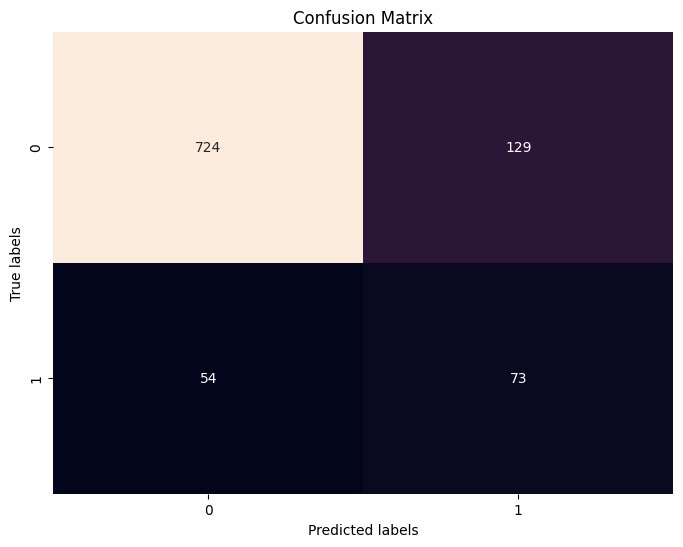

In [ ]:
cm = confusion_matrix(X_test_prediction_gbr, Y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#stochastic Gradient Decent Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
pred_sgd1 = sgd.predict(X_test)
accuracy_sgd = accuracy_score(Y_test, pred_sgd1)
print(f'Model accuracy score: {round(accuracy_score(pred_sgd1, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare_sgd = pd.DataFrame({'Actual' : Y_test, 'Predicted' : pred_sgd1})
print(Y_compare_sgd.head())

Model accuracy score: 80.92%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0


In [ ]:
#using k-fold cross validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=7))
])
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, Y_train)
pred_sgd = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(pred_sgd, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_sgd = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_sgd})
print(Y_compare_sgd.head(17))

Model accuracy score: 80.82%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0
2307       0          0
1186       0          0
3930       0          0
4089       0          0
1060       1          0
2132       0          0
3714       0          0
410        0          0
4306       0          0
846        0          0
4098       0          0
1114       0          0


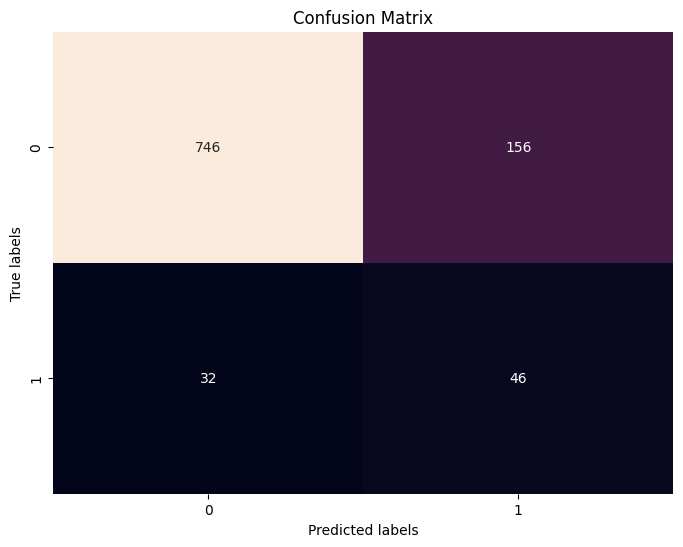

In [ ]:
cm = confusion_matrix(pred_sgd, Y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import warnings
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error,mean_absolute_error
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model","Accuracy", "Precision", "Recall", "F1Score"," mean_squared_error","mean_absolute_error"]
ptbl.add_row(["Random Forest", accuracy_score(X_test_prediction, Y_test),precision_score(X_test_prediction, Y_test, average = 'weighted'),
           recall_score(X_test_prediction, Y_test, average = 'weighted'), f1_score(X_test_prediction, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction, Y_test),mean_absolute_error(X_test_prediction, Y_test)])
ptbl.add_row(["SVM", accuracy_score(X_test_prediction_svm, Y_test),precision_score(X_test_prediction_svm, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_svm, Y_test, average = 'weighted'), f1_score(X_test_prediction_svm, Y_test, average = 'weighted'), mean_squared_error(X_test_prediction_svm, Y_test),mean_absolute_error(X_test_prediction_svm, Y_test)])
ptbl.add_row(["Gradient Boosting", accuracy_score(X_test_prediction_gbr, Y_test),precision_score(X_test_prediction_gbr, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_gbr, Y_test, average = 'weighted'), f1_score(X_test_prediction_gbr, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_gbr, Y_test),mean_absolute_error(X_test_prediction_gbr, Y_test)])
ptbl.add_row(["KNN", accuracy_score(X_test_prediction_knn, Y_test),precision_score(X_test_prediction_knn, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_knn, Y_test, average = 'weighted'), f1_score(X_test_prediction_knn, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_knn, Y_test),mean_absolute_error(X_test_prediction_knn, Y_test)])
ptbl.add_row(["Logistic Regression", accuracy_score(X_test_prediction_logreg, Y_test),precision_score(X_test_prediction_logreg, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_logreg, Y_test, average = 'weighted'), f1_score(X_test_prediction_logreg, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_logreg, Y_test),mean_absolute_error(X_test_prediction_logreg, Y_test)])
ptbl.add_row(["Neural Network", accuracy_score(Y_test,predictions),precision_score(Y_test,predictions, average = 'weighted'),
           recall_score(Y_test,predictions, average = 'weighted'), f1_score(Y_test,predictions, average = 'weighted'),mean_squared_error(Y_test,predictions),mean_absolute_error(Y_test,predictions)])
ptbl.add_row(["SGDClassifier", accuracy_score(Y_test, pred_sgd1),precision_score(Y_test, pred_sgd1, average = 'weighted'),
           recall_score(Y_test, pred_sgd1, average = 'weighted'), f1_score(Y_test, pred_sgd1, average = 'weighted'),mean_squared_error(Y_test, pred_sgd1),mean_absolute_error(Y_test, pred_sgd1)])

print(ptbl)

+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|   Regressor Model   |      Accuracy      |     Precision      |       Recall       |      F1Score       |  mean_squared_error | mean_absolute_error |
+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|    Random Forest    | 0.8795918367346939 | 0.8916587755517591 | 0.8795918367346939 | 0.8841199676287381 | 0.12040816326530612 | 0.12040816326530612 |
|         SVM         | 0.810204081632653  | 0.8933615941731627 | 0.810204081632653  | 0.841843041044169  | 0.18979591836734694 | 0.18979591836734694 |
|  Gradient Boosting  | 0.813265306122449  | 0.8568269225275184 | 0.813265306122449  | 0.8302562461513558 |  0.186734693877551  |  0.186734693877551  |
|         KNN         | 0.8153061224489796 | 0.8743006299213416 | 0.8153061224489796 | 0

In [ ]:
x=wine_dataset.drop('quality',axis=1)
y=wine_dataset['quality']

In [ ]:
selected_features = ['alcohol', 'citric acid', 'sulphates', 'fixed acidity', 'residual sugar']
x = wine_dataset[selected_features]
print(x)

      alcohol  citric acid  sulphates  fixed acidity  residual sugar
0         8.8         0.36       0.45            7.0            20.7
1         9.5         0.34       0.49            6.3             1.6
2        10.1         0.40       0.44            8.1             6.9
3         9.9         0.32       0.40            7.2             8.5
4         9.9         0.32       0.40            7.2             8.5
...       ...          ...        ...            ...             ...
4893     11.2         0.29       0.50            6.2             1.6
4894      9.6         0.36       0.46            6.6             8.0
4895      9.4         0.19       0.46            6.5             1.2
4896     12.8         0.30       0.38            5.5             1.1
4897     11.8         0.38       0.32            6.0             0.8

[4898 rows x 5 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

In [ ]:
y_train

3770    4
3474    6
2696    6
3800    5
280     8
       ..
335     6
4714    7
2004    6
227     6
2761    5
Name: quality, Length: 3918, dtype: int64

In [ ]:
#multi classification
svm_model = SVC()
svm_model.fit(x_train, y_train)
x_test_prediction_svm = svm_model.predict(x_test)
# Accuracy on test data using SVM
test_data_accuracy_svm = accuracy_score(x_test_prediction_svm, y_test)
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction_svm, y_test) * 100, 2)}%')
#actual and predicted values
y_compare_svm = pd.DataFrame({'Actual' : y_test, 'Predicted' : x_test_prediction_svm})
print(y_compare_svm.head())

Model accuracy score: 52.76%
      Actual  Predicted
3765       5          5
154        6          5
1383       6          6
568        6          6
1338       5          6


In [ ]:
# Create a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(decision_function_shape='ovr'))  # 'ovr' for multi-class
])
# Set up k-fold cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=26)
# Perform cross-validation
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='accuracy')
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy score: {round(accuracy_score(y_test,y_pred) * 100, 2)}%')
#actual and predicted values
y_compare_svm = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(y_compare_svm.head())

Model accuracy score: 53.47%
      Actual  Predicted
3765       5          5
154        6          6
1383       6          6
568        6          6
1338       5          6


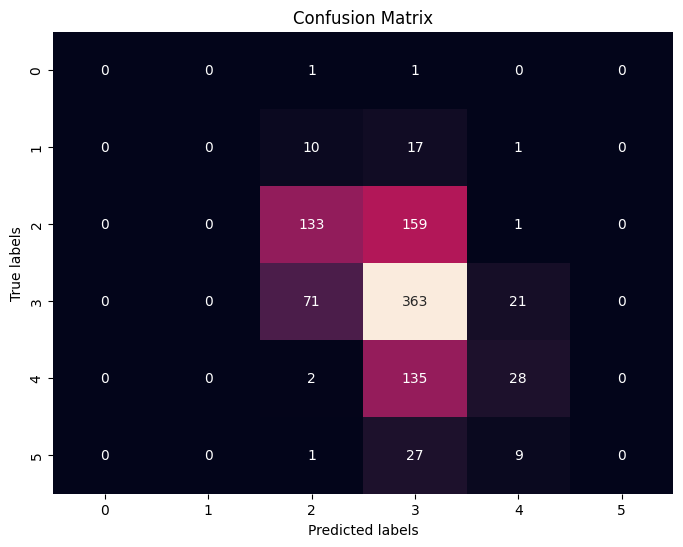

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
x_test_prediction_logreg = logreg_model.predict(x_test)
# Accuracy on test data using Logistic Regression
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction_logreg, y_test) * 100, 2)}%')
#actual and predicted values
y_compare_logreg = pd.DataFrame({'Actual' : y_test, 'Predicted' : x_test_prediction_logreg})
print(y_compare_logreg.head())

Model accuracy score: 51.73%
      Actual  Predicted
3765       5          5
154        6          5
1383       6          6
568        6          6
1338       5          6


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic regression', LogisticRegression(random_state=9))
])
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='accuracy')
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
# Calculate overall accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test,y_pred) * 100, 2)}%')
#actual and predicted values
y_compare_logreg = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(y_compare_logreg.head())

Model accuracy score: 51.94%
      Actual  Predicted
3765       5          5
154        6          6
1383       6          6
568        6          6
1338       5          6


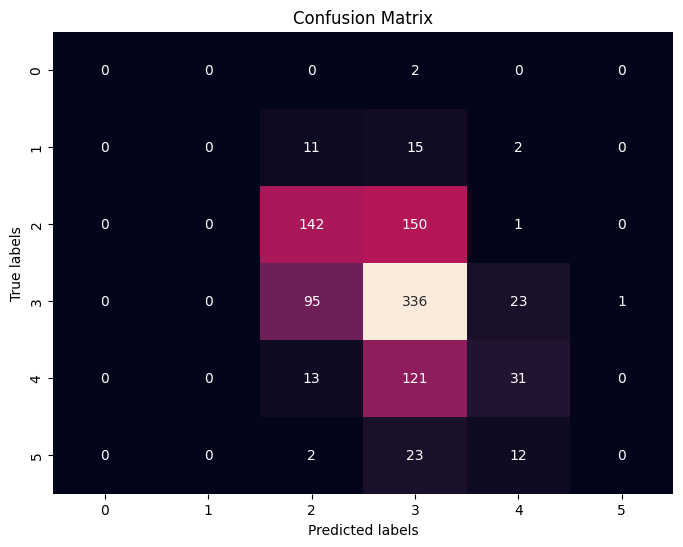

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model = RFC()
model.fit(x_train, y_train)
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction, y_test) * 100, 2)}%')
#actual and predicted values
y_compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : x_test_prediction})
print(y_compare.head())

Model accuracy score: 65.82%
      Actual  Predicted
3765       5          5
154        6          5
1383       6          6
568        6          5
1338       5          5


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RFC(random_state=26))
])
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='accuracy')
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
# Calculate overall accuracy
print(f'Model accuracy score: {round(accuracy_score(y_test,y_pred) * 100, 2)}%')
#actual and predicted values
y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(y_compare_rfc.head())

Model accuracy score: 66.33%
      Actual  Predicted
3765       5          5
154        6          5
1383       6          6
568        6          5
1338       5          5


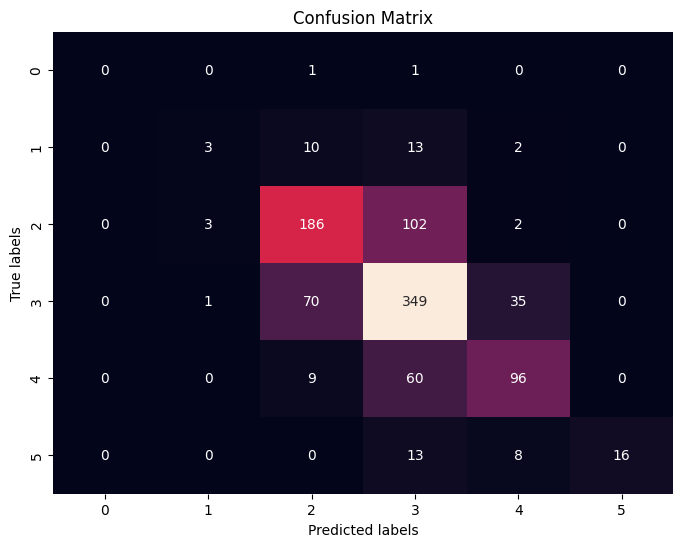

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
x_test_prediction_gb = gb_model.predict(x_test)
# Accuracy on test data using Gradient Boosting
test_data_accuracy_gb = accuracy_score(x_test_prediction_gb, y_test)
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction_gb, y_test) * 100, 2)}%')
#actual and predicted values
y_compare_gb = pd.DataFrame({'Actual' : y_test, 'Predicted' : x_test_prediction_gb})
print(y_compare_gb.head())

Model accuracy score: 57.45%
      Actual  Predicted
3765       5          5
154        6          6
1383       6          5
568        6          6
1338       5          6


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gba', GradientBoostingClassifier(random_state=42))
])
k_folds=10
kf= KFold(n_splits=k_folds, shuffle=True)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')
pipeline.fit(x_train, y_train)
x_test_prediction_gbr = pipeline.predict(x_test)
#overall accuracy
accuracy=accuracy_score(y_test,x_test_prediction_gbr)
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction_gbr, y_test) * 100, 2)}%')
#actual and predicted values
y_compare_gbr = pd.DataFrame({'Actual' : y_test, 'Predicted' : x_test_prediction_gbr})
print(y_compare_gbr.head())

Model accuracy score: 57.24%
      Actual  Predicted
3765       5          5
154        6          6
1383       6          5
568        6          6
1338       5          6


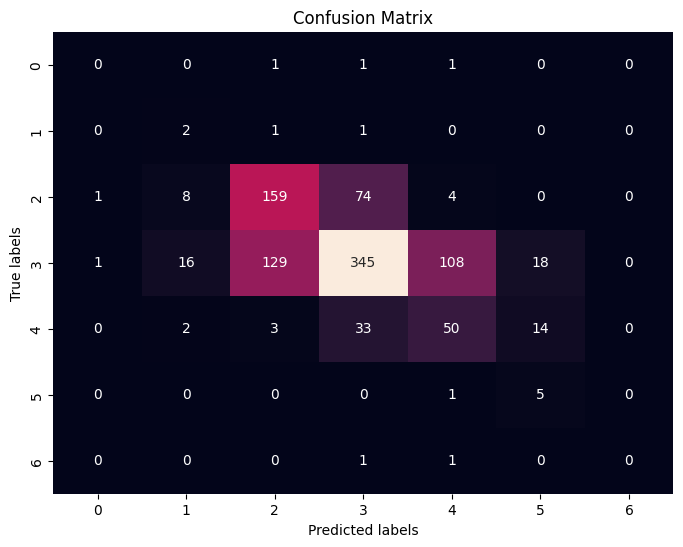

In [ ]:
cm= confusion_matrix(x_test_prediction_gbr, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#stochastic Gradient Decent Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
accuracy_sgd = accuracy_score(y_test, pred_sgd)
print(f'Model accuracy score: {round(accuracy_score(pred_sgd, y_test) * 100, 2)}%')
#actual and predicted values
y_compare_sgd = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_sgd})
print(Y_compare_sgd.head())

Model accuracy score: 46.73%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=40))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')
pipeline.fit(x_train, y_train)
x_test_prediction_svm = pipeline.predict(x_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(x_test_prediction_svm, y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
y_compare_svm = pd.DataFrame({'Actual': y_test, 'Predicted': x_test_prediction_svm})
print(Y_compare_svm.head(10))

Model accuracy score: 44.08%
      Actual  Predicted
3765       0          0
154        0          0
1383       0          0
568        0          0
1338       0          0
2307       0          0
1186       0          0
3930       0          0
4089       0          0
1060       1          0


<function matplotlib.pyplot.show(close=None, block=None)>

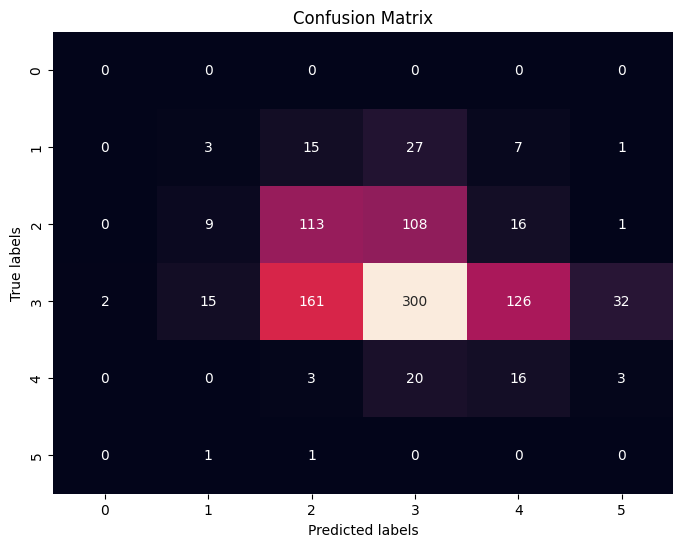

In [ ]:
cm= confusion_matrix(x_test_prediction_svm, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show